In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_trial=pd.merge(clinical_trial_data, mouse_data, how='left', on='Mouse ID')

# Display the data table for preview
mouse_clinical_trial.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
clinical_trial_group=mouse_clinical_trial.groupby(["Drug","Timepoint"])

mean_tumor_volume=clinical_trial_group["Tumor Volume (mm3)"].mean()


# Convert to DataFrame
tumor_chart=pd.DataFrame(mean_tumor_volume)
tumor_chart=tumor_chart.reset_index()
# Preview DataFrame
tumor_chart.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem=clinical_trial_group["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
stderr_chart=pd.DataFrame(sem)
stderr_chart=stderr_chart.reset_index()
# Preview DataFrame
stderr_chart.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frame
format_tumor=tumor_chart.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

format_stderr=stderr_chart.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked

format_stderr.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [5]:
format_tumor.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


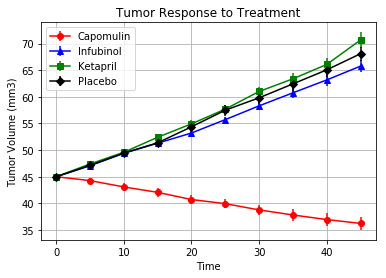

In [6]:
# Generate the Plot (with Error Bars)


x_axis=np.arange(0,50,5)

tumor_response_capomulin = plt.errorbar(x_axis, mean_tumor_volume["Capomulin"], yerr=format_stderr["Capomulin"], color="Red", marker="o", label="Capomulin")
tumor_response_infubinol=plt.errorbar(x_axis,mean_tumor_volume["Infubinol"], yerr=format_stderr["Infubinol"], color="Blue", marker="^", label="Infubinol")
tumor_response_ketapril=plt.errorbar(x_axis,mean_tumor_volume["Ketapril"], yerr=format_stderr["Ketapril"], color="Green", marker="s", label="Ketapril")
tumor_response_placebo=plt.errorbar(x_axis,mean_tumor_volume["Placebo"],  yerr=format_stderr["Placebo"], color="Black", marker="D", label="Placebo")
plt.grid()
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time")
plt.legend()
plt.title("Tumor Response to Treatment")
# Save the figure
plt.savefig("tumor_response_to_treatment")
# Show the plot
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
clinical_trial_group=mouse_clinical_trial.groupby(["Drug","Timepoint"])

mean_metsite=clinical_trial_group["Metastatic Sites"].mean()

# Convert to DataFrame
metsite_chart=pd.DataFrame(mean_metsite)
metsite_chart=metsite_chart.reset_index()
# Preview DataFrame
metsite_chart.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem=clinical_trial_group["Metastatic Sites"].sem()
# Convert to DataFrame
stderr_chart=pd.DataFrame(sem)
stderr_chart=stderr_chart.reset_index()
# Preview DataFrame
stderr_chart.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frame
format_metsite=metsite_chart.pivot(index= "Timepoint", columns="Drug", values="Metastatic Sites")

metsite_stderr=stderr_chart.pivot(index= "Timepoint", columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
format_metsite.head()
metsite_stderr.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


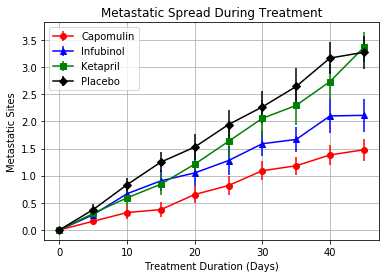

In [10]:
# Generate the Plot (with Error Bars)
x_axis=np.arange(0,50,5)

metsite_capomulin = plt.errorbar(x_axis, mean_metsite["Capomulin"], yerr=metsite_stderr["Capomulin"], color="Red", marker="o", label="Capomulin")
metsite_infubinol=plt.errorbar(x_axis,mean_metsite["Infubinol"], yerr=metsite_stderr["Infubinol"], color="Blue", marker="^", label="Infubinol")
metsite_ketapril=plt.errorbar(x_axis,mean_metsite["Ketapril"], yerr=metsite_stderr["Ketapril"], color="Green", marker="s", label="Ketapril")
metsite_placebo=plt.errorbar(x_axis,mean_metsite["Placebo"],  yerr=metsite_stderr["Placebo"], color="Black", marker="D", label="Placebo")
plt.grid()
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.legend()
plt.title("Metastatic Spread During Treatment")
# Save the figure
plt.savefig("metastatic_spread_during_treatment")
# Show the plot
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
clinical_trial_group=mouse_clinical_trial.groupby(["Drug","Timepoint"])

mice_count=clinical_trial_group["Mouse ID"].count()

# Convert to DataFrame
mouse_count_chart=pd.DataFrame(mice_count)
mouse_count_chart=mouse_count_chart.reset_index()
mouse_count_chart.rename(columns={"Mouse ID":"Mouse Count"}, inplace=True)
# Preview DataFrame
mouse_count_chart.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frame
format_mouse_count=mouse_count_chart.pivot(index= "Timepoint", columns="Drug", values="Mouse Count")


# Preview that Reformatting worked
format_mouse_count.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


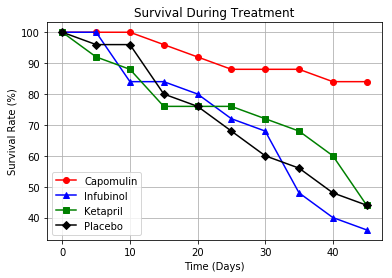

In [13]:
# Generate the Plot (Accounting for percentages)
x_axis=np.arange(0,50,5)
mice_yaxis=(mice_count/25)*100
mouse_count_capomulin = plt.plot(x_axis, mice_yaxis["Capomulin"], color="Red", marker="o", label="Capomulin")
mouse_count_infubinol=plt.plot(x_axis,mice_yaxis["Infubinol"], color="Blue", marker="^", label="Infubinol")
mouse_count_ketapril=plt.plot(x_axis,mice_yaxis["Ketapril"], color="Green", marker="s", label="Ketapril")
mouse_count_placebo=plt.plot(x_axis,mice_yaxis["Placebo"], color="Black", marker="D", label="Placebo")
plt.grid()
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.legend()
plt.title("Survival During Treatment")
# Save the figure
plt.savefig("survival_during_treatment")
# Show the plot
plt.show()


## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
tumor_percent_change=((format_tumor.iloc[-1]-format_tumor.iloc[0])/format_tumor.iloc[0])*100

# Display the data to confirm

tumor_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

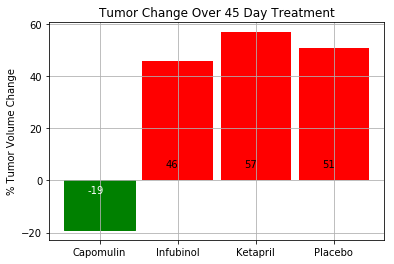

In [15]:
# Store all Relevant Percent Changes into a Tuple
drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
capomulin_percent=int(tumor_percent_change["Capomulin"])
infubinol_percent=int(tumor_percent_change["Infubinol"])
ketapril_percent=int(tumor_percent_change["Ketapril"])
placebo_percent=int(tumor_percent_change["Placebo"])

specific_percents =(capomulin_percent,infubinol_percent, ketapril_percent,placebo_percent)

# Splice the data between passing and failing drugs
    

# Orient widths. Add labels, tick marks, etc. 
x_axis=np.arange(len(specific_percents))
y_axis=np.arange(-20,70,20)
fig=plt.bar(x_axis,specific_percents, width=.9, color="r", align="center")
fig[0].set_color("g")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)
plt.yticks(y_axis)
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

# Use functions to label the percentages of changes
for x in range(len(specific_percents)):
    if x==0:
        plt.text(-.15,-5,specific_percents[x],color="white")
    if x>0:
        plt.text(x-.15,5, specific_percents[x])    

# Call functions to implement the function calls


# Save the Figure
plt.savefig("tumor_change_over_day_treatment")

# Show the Figure
#fig.show()

## Three findings from my data: 
* From looking at the "Tumor Response to Treatment" it is evident that Capomulin is the only drug that had a positive impact on the mice. The tumor volume shrunk significantly compared to the three other drugs. 
* From looking at the "Metastatic Spread During Treatment Chart" I can tell that, one again, capomulin was the most successful in hindering the spread of cancer. There is a chance that Infubinol prevents the spread of cancer slightly, but in my opinion the graph is not strong enough to suggest this. The placebo and Ketapril have nearly the same trend, suggesting that Ketapril did not slow down the spreading at all. 
* From the "Survival During Treatment" chart it is clear that Capomulin is the only successful drug. The other two follow the same line as the Placebo. Overall, Capomulin was affective while the Infubinol and Ketapril were not. 